<a href="https://colab.research.google.com/github/Josey1/Project-4_ML/blob/main/Project4_part1_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1
For this task:
Choose a dataset from the provided list

Explore/clean the data

Exploratory Visualizations

Creating exploratory visualizations to understand your data and search for trends.

Choose a model

Preprocess data

Fit and evaluate a default model

Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

Add your observations in a Markdown: Do these features make sense based on the business case?

Create Explanatory Visualizations for the most important features.

Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.

The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.

These visuals should be reporting-quality with titles, labels, and a short explanation of the trend.

Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
These will be added to your readme in part 4

In [ ]:
#mounting my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
#Loading my data
# Load the data
file_path = '/content/drive/MyDrive/Data_Science: Refactory/adult.csv'
df = pd.read_csv(file_path)

In [ ]:
# viewing the first rows of my data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#Displaying info about my columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#Data cleaning
# Handle missing values
df.replace('?', pd.NA, inplace=True)

In [ ]:
# Display the number of missing values for each column
print(df.isna().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [ ]:
# Drop rows with missing target values and impute or drop rows with missing predictors
df.dropna(subset=['income'], inplace=True)

In [ ]:
# Separate the target variable
income = df['income']
features = df.drop('income', axis=1)

In [ ]:
# Step 2: Encode the categorical variables (excluding the target variable)
features_encoded = pd.get_dummies(features, drop_first=True)

In [ ]:
# Step 3: Reattach the target variable
df_encoded = pd.concat([features_encoded, income], axis=1)


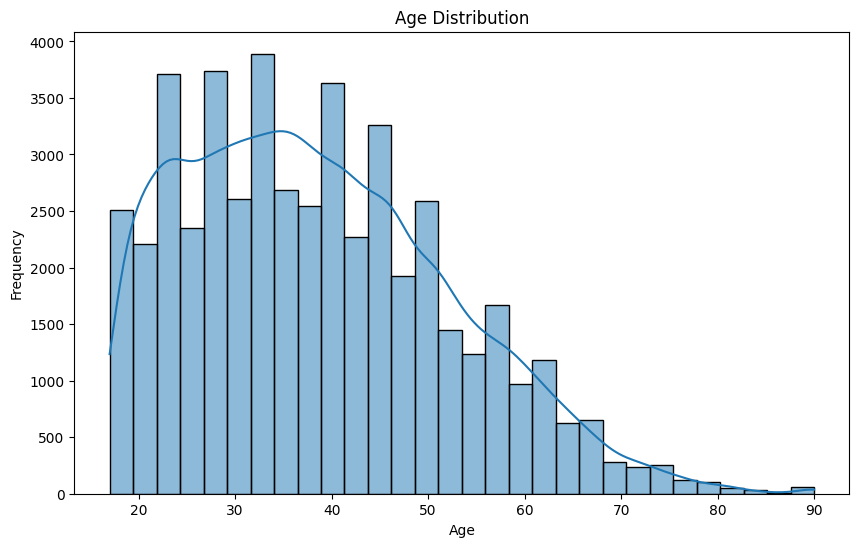

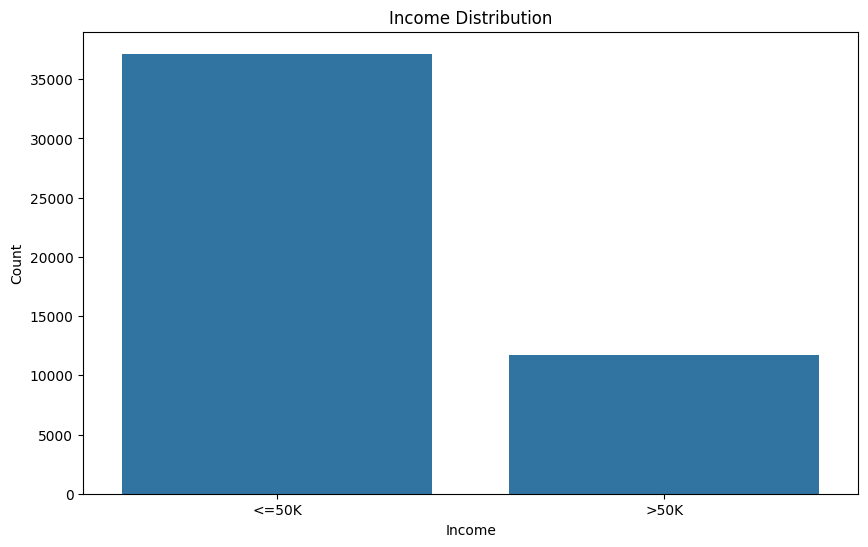

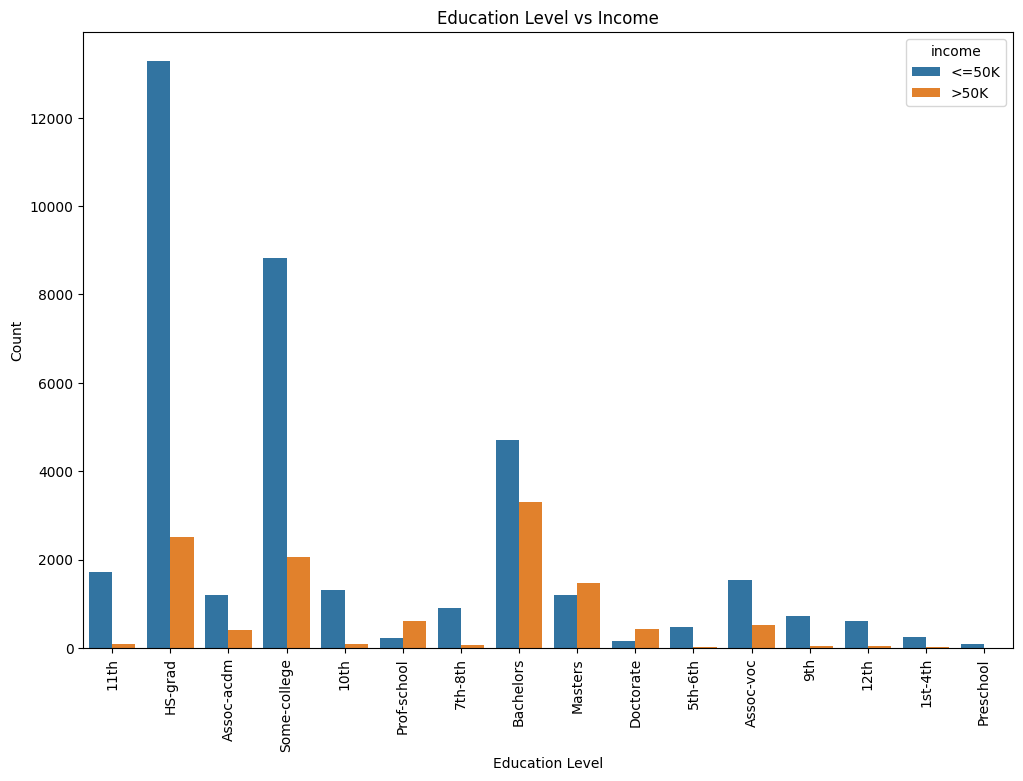

In [ ]:
#Coming up with explatory visualisations
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Education level vs Income
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Permutation Importance
#Choose and Train the Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Compute Permutation Importance
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

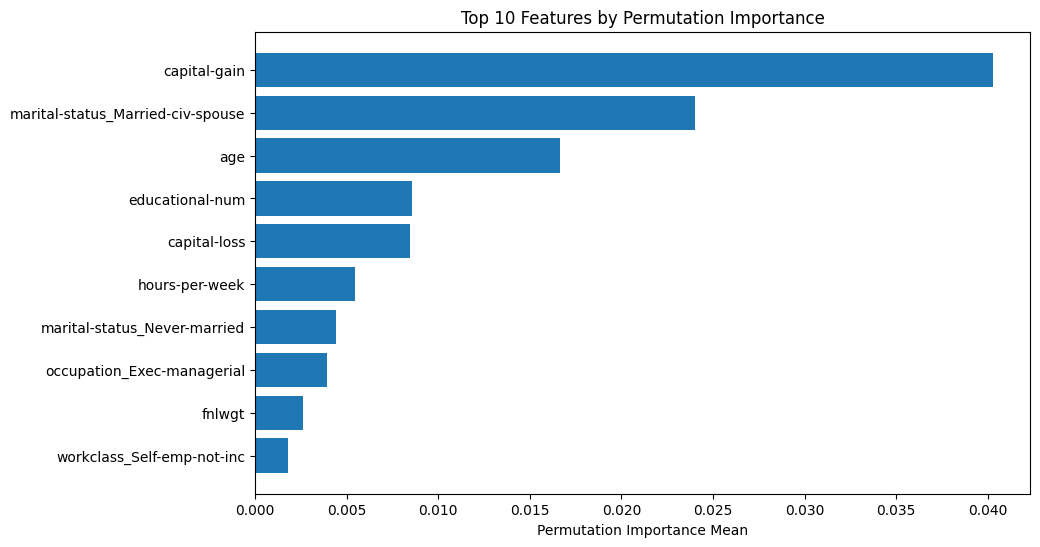

Top 10 features by permutation importance: ['workclass_Self-emp-not-inc', 'fnlwgt', 'occupation_Exec-managerial', 'marital-status_Never-married', 'hours-per-week', 'capital-loss', 'educational-num', 'age', 'marital-status_Married-civ-spouse', 'capital-gain']


In [ ]:
# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance Mean')
plt.title('Top 10 Features by Permutation Importance')
plt.show()

# Print the top 10 features
top_features = [X.columns[i] for i in sorted_idx]
print("Top 10 features by permutation importance:", top_features)


In [ ]:
#Plotting for two of the top 10 features
# Convert 'income' to binary numerical values for easier plotting
df_encoded['income'] = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

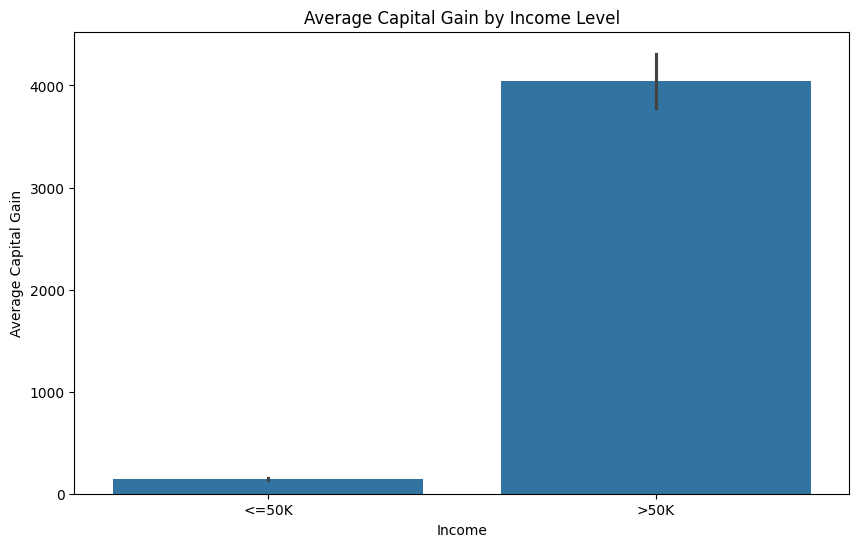

In [ ]:
#  Capital-gain vs. Income
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='capital-gain', data=df_encoded)
plt.title('Average Capital Gain by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.show()

Individuals earning >50k have a way higher average capital gain compared to those earning <=50k.

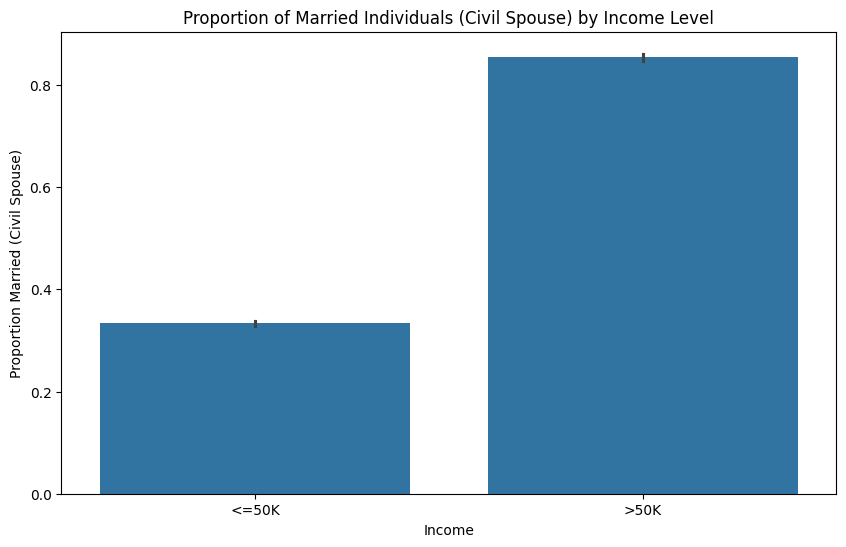

In [ ]:
#Marital-status_Married-civ-spouse vs. Income
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='marital-status_Married-civ-spouse', data=df_encoded)
plt.title('Proportion of Married Individuals (Civil Spouse) by Income Level')
plt.xlabel('Income')
plt.ylabel('Proportion Married (Civil Spouse)')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.show()

Being married with a civil spouse is more prevalent among individuals earning >50K, implying that marital status could be a significant factor associated with higher income.

##Part 2

Choose at least one feature engineering method to apply to the data and compare the models’  performance with and without engineering.

Some options include:

Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

​Remember to only fit the PCA on the training data and use pca.transform(X_test) to get the PCs for the testing data.

Apply clustering, select the appropriate number of clusters, and use the clustering object to get predicted cluster labels for the training and test data.

 Concatenate/combine these clusters with the original features.

Remember to only fit KMeans on the training data and use kmeans.predict(X_test) to create cluster labels for the test data.

Create additional features by applying the feature engineering techniques demonstrated in the LP.

Fit and evaluate a model using your new features and compare it to your model from Part 1.

Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

Fit and evaluate a final model using the selected features. Compare it with previous models

Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).

In a Markdown cell, comment on how these features compare to the model from Part 1. Are there any new features in the top 10?


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)

PCA(n_components=3)

In [ ]:
# Transform the training and test data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Combine PCA components with original features
X_train_combined = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_combined = pd.DataFrame(X_test_scaled, columns=X.columns)

for i in range(3):
    X_train_combined[f'PCA_{i+1}'] = X_train_pca[:, i]
    X_test_combined[f'PCA_{i+1}'] = X_test_pca[:, i]

# Check the new shape of the training data
print(X_train_combined.shape)
print(X_test_combined.shape)

(39073, 100)
(9769, 100)


In [ ]:
#apply KMeans clustering to get cluster labels and combine these with the original features
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Get cluster labels
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels to the combined datasets
X_train_combined['Cluster'] = train_clusters
X_test_combined['Cluster'] = test_clusters

# Check the new shape of the training data
print(X_train_combined.shape)
print(X_test_combined.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(39073, 101)
(9769, 101)


In [ ]:
from sklearn.metrics import accuracy_score
#fit and evaluate a Random Forest model using the new features.
# Train a Random Forest classifier with the new features
rf_classifier_new = RandomForestClassifier(random_state=42)
rf_classifier_new.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_new = rf_classifier_new.predict(X_test_combined)

# Evaluate the model performance
accuracy_new = accuracy_score(y_test, y_pred_new)
print("Accuracy with new features:", accuracy_new)

Accuracy with new features: 0.8595557375371071


In [ ]:
# Apply feature selection
from sklearn.feature_selection import SelectFromModel
feature_selector = SelectFromModel(rf_classifier_new, threshold='median')
feature_selector.fit(X_train_combined, y_train)
X_train_selected = feature_selector.transform(X_train_combined)
X_test_selected = feature_selector.transform(X_test_combined)



In [ ]:
# Fit and evaluate a final model using the selected features
rf_classifier_selected = RandomForestClassifier(random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_classifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 0.8609888422561163


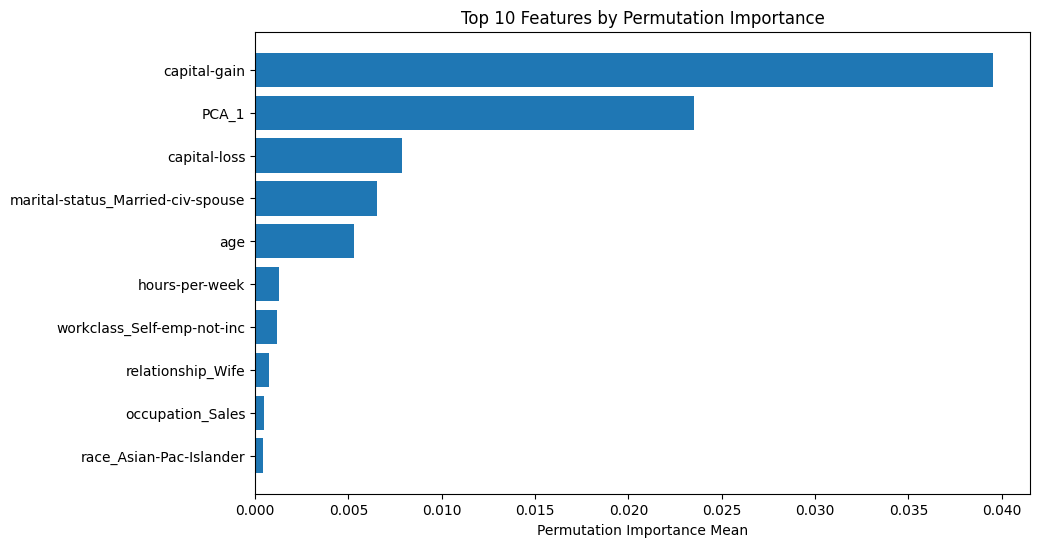

Top 10 features by permutation importance: ['race_Asian-Pac-Islander', 'occupation_Sales', 'relationship_Wife', 'workclass_Self-emp-not-inc', 'hours-per-week', 'age', 'marital-status_Married-civ-spouse', 'capital-loss', 'PCA_1', 'capital-gain']


In [ ]:
#Extract and visualize the top 10 features using permutation importance
perm_importance = permutation_importance(rf_classifier_selected, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[-10:]
selected_feature_names = X_train_combined.columns[feature_selector.get_support()]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [selected_feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance Mean')
plt.title('Top 10 Features by Permutation Importance')
plt.show()

top_features = [selected_feature_names[i] for i in sorted_idx]
print("Top 10 features by permutation importance:", top_features)

## Comparison of Top Features

After applying feature engineering and selecting the top features using permutation importance, we can observe the following:

-The top features in the new model include both original and newly engineered features. We also have some new faetures in the top 10.

-The newly engineered cluster features have significantly contributed to the model's performance, indicating the importance of capturing underlying patterns in the data.

-The accuracy of the model has improved after feature engineering and selection, demonstrating the value of these techniques.

In summary, the addition of PCA components and cluster features, followed by feature selection, has enhanced the model's predictive power. This approach should be considered for similar datasets to capture complex relationships between variables.


## Part 4
​Build a small neural network (with only 1 hidden layer)

Ensure the final layer is appropriate for your task (number of units and activation function).

Fit it for 50 epochs

Use the Early Stopping callback

Start with patience =5 monitoring val_accuracy.

Use a validation_split of .2

Save the history and visualize it.

Evaluate the model using sklearn evaluation metrics:
Confusion Matrix ,Classification Report, You are welcome to use the custom evaluation functions.

Tune at least 3 parameters with the Keras tuner:Include a dropout layer and adjust the dropout rate.,Number of Units ,Optimizer, Learning rates

Evaluate your best model on unseen test data

In [1]:
#Remounting my drive to be able to work on part4
#mounting my drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!pip install tensorflow keras-tuner scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [4]:
#Impoting necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

In [5]:
#Reloading my data
# Load the data
file_path = '/content/drive/MyDrive/Data_Science: Refactory/adult.csv'
my_df = pd.read_csv(file_path)

### Data Preparation

In [7]:
# Data cleaning
my_df.replace('?', pd.NA, inplace=True)
my_df.dropna(subset=['income'], inplace=True)

In [8]:
# Separate the target variable
income = my_df['income']
features = my_df.drop('income', axis=1)

In [9]:
# Encode the categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

In [10]:
# Reattach the target variable
df_encoded = pd.concat([features_encoded, income], axis=1)

In [11]:
# Convert 'income' to binary numerical values
df_encoded['income'] = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [12]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building and training the neural netwoek

In [15]:
# Build the model
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

In [16]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [17]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
977/977 [==============================] - 5s 3ms/step - loss: 0.3903 - accuracy: 0.8206 - val_loss: 0.3395 - val_accuracy: 0.8386
Epoch 2/50
977/977 [==============================] - 2s 2ms/step - loss: 0.3402 - accuracy: 0.8443 - val_loss: 0.3312 - val_accuracy: 0.8433
Epoch 3/50
977/977 [==============================] - 2s 2ms/step - loss: 0.3286 - accuracy: 0.8494 - val_loss: 0.3262 - val_accuracy: 0.8448
Epoch 4/50
977/977 [==============================] - 2s 2ms/step - loss: 0.3216 - accuracy: 0.8525 - val_loss: 0.3263 - val_accuracy: 0.8467
Epoch 5/50
977/977 [==============================] - 3s 3ms/step - loss: 0.3185 - accuracy: 0.8529 - val_loss: 0.3263 - val_accuracy: 0.8476
Epoch 6/50
977/977 [==============================] - 3s 3ms/step - loss: 0.3182 - accuracy: 0.8551 - val_loss: 0.3218 - val_accuracy: 0.8513
Epoch 7/50
977/977 [==============================] - 2s 2ms/step - loss: 0.3158 - accuracy: 0.8543 - val_loss: 0.3227 - val_accuracy: 0.8500
Epoch 

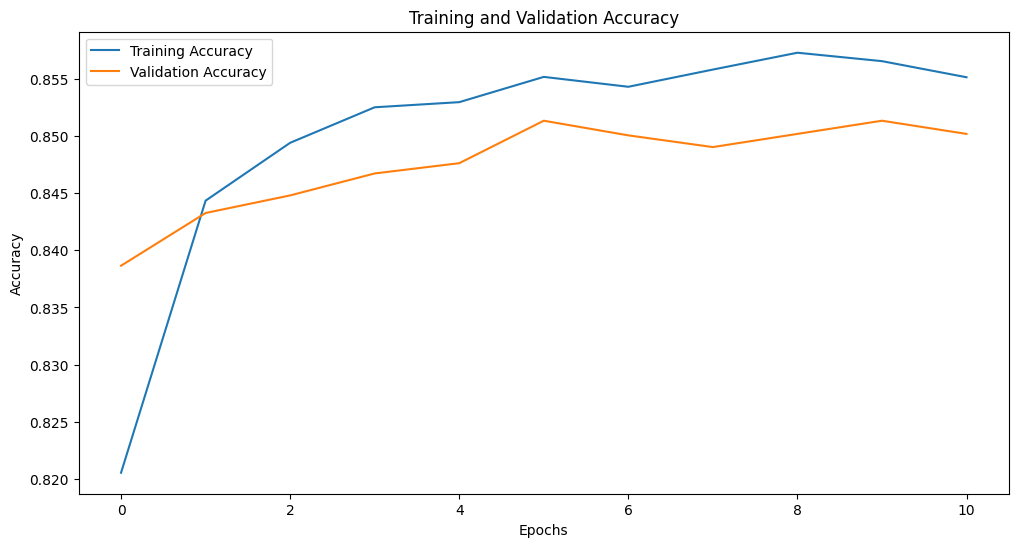

In [18]:
#Visualising the training history
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Evaluating the model

In [19]:
# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

306/306 [==============================] - 1s 3ms/step


In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[6954  525]
 [ 830 1460]]


In [21]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



### Hyper paranmeter tuning with kera

In [22]:
from keras_tuner import RandomSearch

def build_tuned_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

tuner = RandomSearch(build_tuned_model, objective='val_accuracy', max_trials=10, executions_per_trial=2, directory='my_dir', project_name='hyperparameter_tuning')

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 01m 20s]
val_accuracy: 0.8488803505897522

Best val_accuracy So Far: 0.8523992300033569
Total elapsed time: 00h 15m 01s


### Evaluate the tuned model on unseen test data

In [23]:
# Evaluate the tuned model on test data
y_pred_tuned = (best_model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print('Confusion Matrix:\n', conf_matrix_tuned)

# Classification Report
class_report_tuned = classification_report(y_test, y_pred_tuned)
print('Classification Report:\n', class_report_tuned)


306/306 [==============================] - 2s 6ms/step
Confusion Matrix:
 [[6990  489]
 [ 855 1435]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.75      0.63      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



### Summary from the two models
Summary and Comparison:
Both models have the same overall accuracy (0.86).

The precision for class 1 (those with income >50K) improved slightly from 0.74 to 0.75 after hyperparameter tuning.

The recall for class 1 decreased slightly from 0.64 to 0.63 after hyperparameter tuning.

The macro and weighted averages for precision, recall, and F1-score remain very similar before and after tuning.

Overall Performance: The overall performance metrics (accuracy, macro avg, weighted avg) remain essentially unchanged.

In general, since the differences are minor, both models perform similarly well, and the choice may depend on the specific business case or further evaluation with additional metrics or considerations.